# Dask Basics

In this notebook we demonstrate some basic features when working with Nd array data:

* Dask array - lazy loading
* daskarray.compute( )
* daskarray.visulize( )
* Diagnostic tool - ProgressBar
* Reduction
---

- Authors: NCI Virtual Research Environment Team
- Keywords: Xarray, Dask, Diagnostics
- Create Date: 2020-May; Update Date: 2020-May
- Lineage/Reference: This tutorial is developed based on [Ryan Abernathey's lecture](https://rabernat.github.io/research_computing_2018/dask-for-parallel-computing-and-big-data.html) and [dask tutorial](https://github.com/dask/dask-tutorial).

### Prerequisite

The following modules are needed:

* Xarray
* Dask

## Dask

Dask is a parallel computing library that scales the existing Python ecosystem. This tutorial will introduce Dask and parallel data analysis more generally. 

Dask provides multi-core and distributed parallel execution on larger-than-memory datasets. Dask can scale down to your laptop and up to a cluster. 

We can think of Dask at a high and a low level:

**High level collections**: Dask provides high-level Array, Bag, and DataFrame collections that mimic NumPy, lists, and Pandas but can operate in parallel on datasets that don't fit into memory. Dask's high-level collections are alternatives to NumPy and Pandas for large datasets.

**Low Level schedulers**: Dask provides dynamic task schedulers that execute task graphs in parallel. These execution engines power the high-level collections mentioned above but can also power custom, user-defined workloads. These schedulers are low-latency (around 1ms) and work hard to run computations in a small memory footprint. Dask's schedulers are an alternative to direct use of threading or multiprocessing libraries in complex cases or other task scheduling systems like Luigi or IPython parallel.

#### Load the required modules

In [1]:
import xarray as xr
import dask.array as da
import graphviz

In [11]:
# Create cluster
from dask.distributed import Client,LocalCluster
client = Client(scheduler_file='scheduler.json')
print(client)

<Client: 'tcp://10.6.24.38:8770' processes=32 threads=32, memory=68.72 GB>


Starting the Dask Client is optional. It will provide a dashboard which is useful to gain insight on the computation.

The link to the dashboard will become visible when you create the client below. We recommend having it open on one side of your screen while using your notebook on the other side. This can take some effort to arrange your windows, but seeing them both at the same is very useful when learning.

### Dask Arrays

A dask array looks and feels a lot like a numpy array. However, a dask array doesn't directly hold any data. Instead, it symbolically represents the computations needed to generate the data. Nothing is actually computed until the actual numerical values are needed. This mode of operation is called "lazy"; it allows one to build up complex, large calculations symbolically before turning them over the scheduler for execution.

In [3]:
shape = (1000, 4000)
chunk_shape = (1000, 1000)
ones = da.ones(shape, chunks=chunk_shape)
ones

dask.array<ones, shape=(1000, 4000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

Notice that we just see a symbolic represetnation of the array, including its shape, dtype, and chunksize. No data has been generated yet. When we call `.compute()` on a dask array, the computation is triggered and the dask array becomes a numpy array.

In [4]:
ones.compute()

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In order to understand what happened when we called .compute(), we can visualize the dask graph, the symbolic operations that make up the array

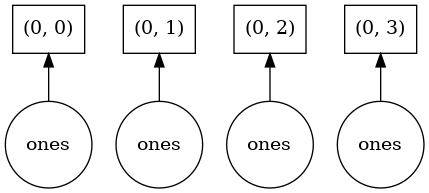

In [5]:
ones.visualize()

Our array has four chunks. To generate it, dask calls np.ones four times and then concatenates this together into one array.

Rather than immediately loading a dask array (which puts all the data into RAM), it is more common to want to reduce the data somehow. For example

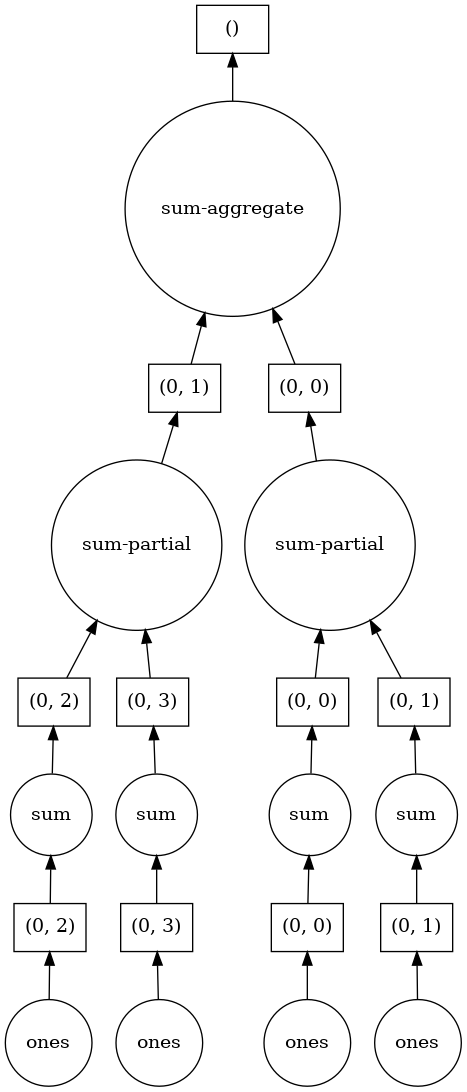

In [6]:
sum_of_ones = ones.sum()
sum_of_ones.visualize()

Here we see dask's strategy for finding the sum. This simple example illustrates the beauty of dask: it automatically designs an algorithm appropriate for custom operations with big data.

If we make our operation more complex, the graph gets more complex.

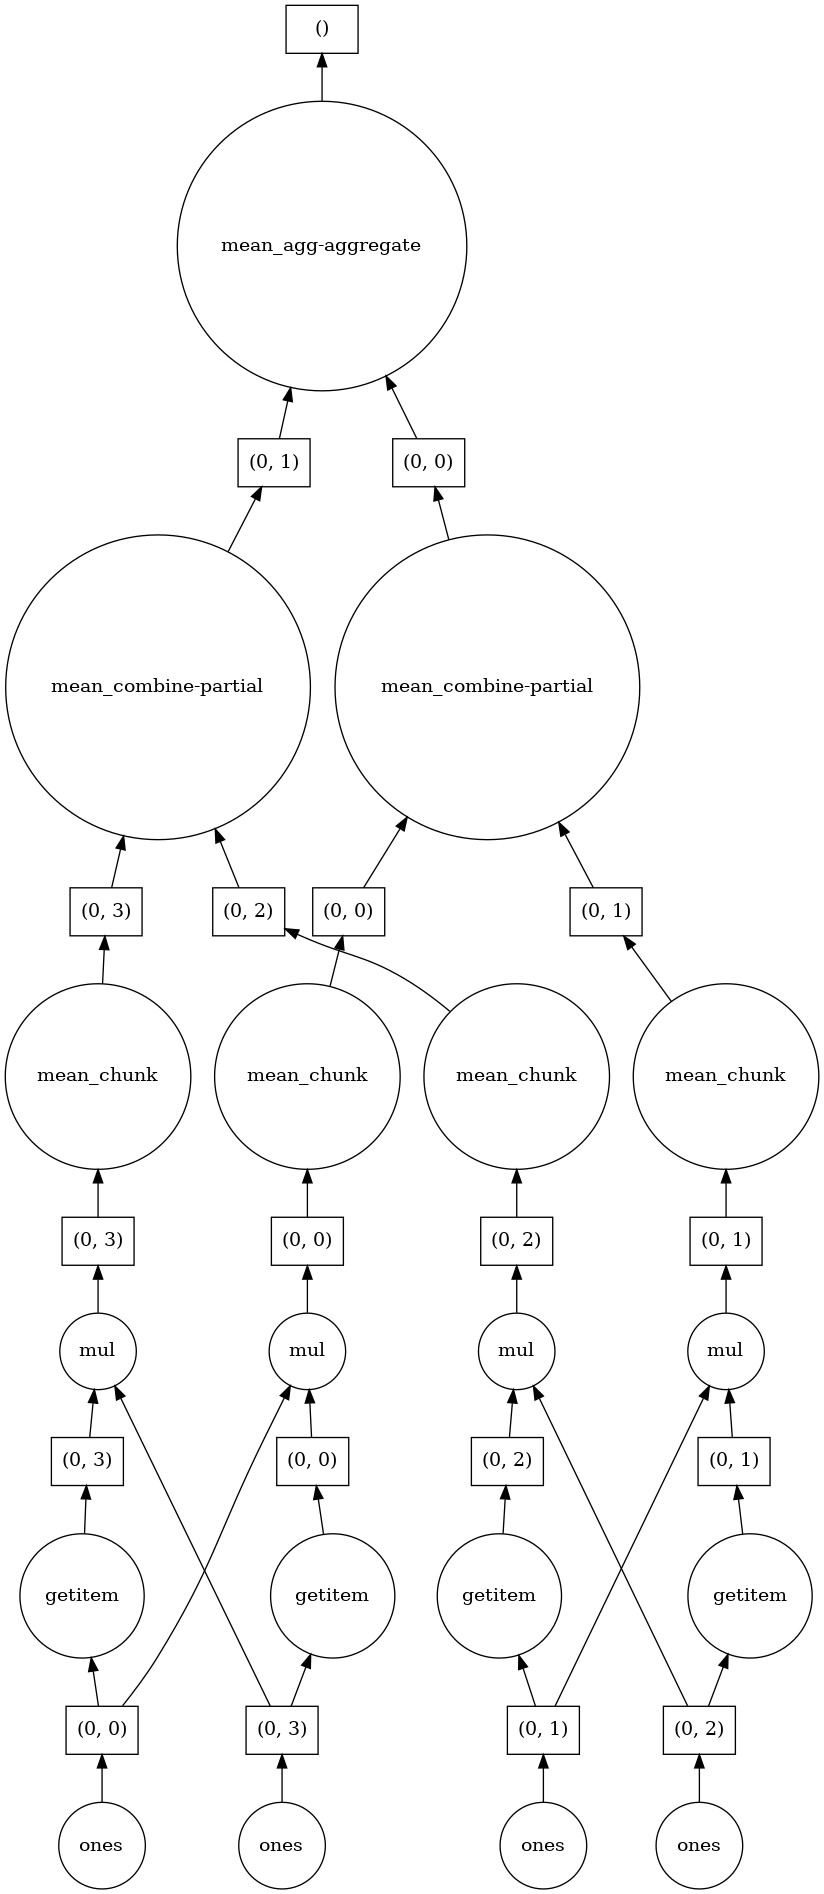

In [7]:
fancy_calculation = (ones * ones[::-1, ::-1]).mean()
fancy_calculation.visualize()

### Monitor big calculate with Progressbar

When doing a big calculation, dask also has some tools to help us understand what is happening under the hood.

In [10]:
bigshape = (200000, 4000)
big_ones = da.ones(bigshape, chunks=chunk_shape)
big_ones

from dask.diagnostics import ProgressBar

big_calc = (big_ones * big_ones[::-1, ::-1]).mean()

with ProgressBar():
    result = big_calc.compute()


This dataset is 3.2 GB, rather MB! This is probably close to or greater than the amount of available RAM than you have in your computer. Nevertheless, dask has no problem working on it.

Do not try to .visualize() this array!

When doing a big calculation, dask also has some tools to help us understand what is happening under the hood

### Reduction

All the usual numpy methods work on dask arrays. You can also apply numpy function directly to a dask array, and it will stay lazy.

In [9]:
import numpy as np
big_ones_reduce = (np.cos(big_ones)**2).mean(axis=0)
big_ones_reduce

dask.array<mean_agg-aggregate, shape=(4000,), dtype=float64, chunksize=(1000,), chunktype=numpy.ndarray>

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

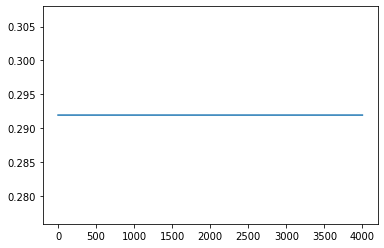

In [18]:
plt.plot(big_ones_reduce)

### Summary

This example shows some basic concepts of dask operation .compute() and .visulize() and diagnostic tool - progress bar.

## Reference

https://rabernat.github.io/research_computing_2018/dask-for-parallel-computing-and-big-data.html